# Finding the LMC orbit ICs

In [23]:
%pylab inline
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


### Time of initial condition at which the N-body simulations starts. 

In [8]:
real_r = np.sqrt((-1.0)**2 + (-41.0)**2 + (-28.0)**2)
real_v  = np.sqrt((-57.0)**2 + (-226.0)**2 + (221.0)**2)

## Function to read data

In [9]:
def reading(filename):
    A1_host = loadtxt('../../../orbits/data/lmc/mw1lmc4/' + filename + '_host.txt')
    A1_sat = loadtxt('../../../orbits/data/lmc/mw1lmc4/' + filename + '_sat.txt')
    # Making Nbody and Analytic times equal
    t = A1_host[:,0] 
    # Defining galactocentric distances and velocities
    x = A1_sat[:,1] - A1_host[:,1] 
    y = A1_sat[:,2] - A1_host[:,2] 
    z = A1_sat[:,3] - A1_host[:,3] 

    vx = A1_sat[:,4] - A1_host[:,4] 
    vy = A1_sat[:,5] - A1_host[:,5] 
    vz = A1_sat[:,6] - A1_host[:,6] 
    R = np.sqrt(x**2 + y**2 + z**2)
    V = np.sqrt(vx**2 + vy**2 + vz**2)
    return t, x, y, z, vx, vy, vz, R, V

def reading_NB(filename):
    Nbody1 = loadtxt(filename)
    NB_t1 = Nbody1[:,0] 
    NB_R1 = Nbody1[:,1]
    NB_V1 = Nbody1[:,8]
    XNB = Nbody1[:,2] - Nbody1[:,5]
    YNB = Nbody1[:,3] - Nbody1[:,6]
    ZNB = Nbody1[:,4] - Nbody1[:,7]
    VXNB = Nbody1[:,9] - Nbody1[:,12]
    VYNB = Nbody1[:,10] - Nbody1[:,13]
    VZNB = Nbody1[:,11] - Nbody1[:,14]
    return NB_t1, XNB, YNB, ZNB, VXNB, VYNB, VZNB, NB_R1, NB_V1

Integrate the orbit using the Analytic code from the acutal position
of the LMC to 2Gyr ago. Without modifying the Coulomb Logarithm.

In [31]:
t1, x1, y1, z1, vx1, vy1, vz1, R1, V1 = reading('mw1lmc4-1')
#tNB14, xNB14, yNB14, zNB14, vxNB14, vyNB14, vzNB14, RNB14, VNB14  = reading_NB('LMCMW-H6.txt')

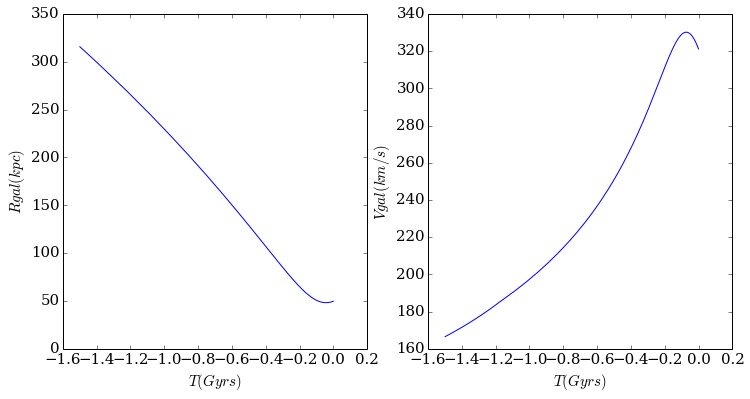

In [24]:
figure(figsize=(12, 6))
subplot(1, 2, 1)
plot(t1, R1)
plt.xlabel('$T(Gyrs)$')
plt.ylabel('$Rgal(kpc)$')

subplot(1, 2, 2)
plot(t1, V1)
plt.xlabel('$T(Gyrs)$')
plt.ylabel('$Vgal(km/s)$')

## ICs for the Nbody Sim

In [15]:
def ICs1(t, R, x, y, z, vx, vy, vz):
    RIC = where(R >= 280)[0]
    IC1 = RIC[0]
    xIC = x[IC1] 
    yIC = y[IC1] 
    zIC = z[IC1] 
    vxIC = vx[IC1] 
    vyIC = vy[IC1] 
    vzIC = vz[IC1] 
    tIC = t[IC1]
    return xIC, yIC, zIC, vxIC, vyIC, vzIC, tIC

## Reading the CM of the MW and the LMC!

In [32]:
xic, yic, zic, vxic, vyic, vzic, tic = ICs1(t1, R1, x1, y1, z1, vx1, vy1, vz1)
print "x:", xic
print "y:", yic
print "z:", zic
print "vx:", vxic
print "vy:", vyic
print "vz:", vzic
print "time of IC:", tic

x: 43.490378
y: 261.472044
z: -90.572333
vx: -20.21568
vy: -177.004835
vz: -5.972404
time of IC: -1.283


In [34]:
t1NB, x1NB, y1NB, z1NB, vx1NB, vy1NB, vz1NB, R1NB, V1NB = reading_NB('LMCMWa1.txt')
print x1NB[0], y1NB[0], z1NB[0], vx1NB[0], vy1NB[0], vz1NB[0]

41.774541 256.790722 -87.335607 -21.715361 -179.137027 -5.200094


## Function that returns the corrected ICs for the N-body simulations

In [38]:
def ICs(t, R, x, y, z, vx, vy, vz, xNB, yNB, zNB, vxNB, vyNB, vzNB):
    RIC = where(R >= 280)[0]
    IC1 = RIC[0]
    xIC = x[IC1] + (x[IC1] - xNB[0])
    yIC = y[IC1] + (y[IC1] - yNB[0])
    zIC = z[IC1] + (z[IC1] - zNB[0])
    vxIC = vx[IC1] + (vx[IC1] - vxNB[0])
    vyIC = vy[IC1] + (vy[IC1] - vyNB[0])
    vzIC = vz[IC1] + (vz[IC1] - vzNB[0])
    tIC = t[IC1]
    return xIC, yIC, zIC, vxIC, vyIC, vzIC, tIC

In [40]:
print 'Initial corrected values for the Nbody'
xicn, yicn, zicn, vxicn, vyicn, vzicn, ticn = ICs(t1, R1, x1, y1, z1, vx1, vy1, vz1, x1NB, y1NB, z1NB, vx1NB, vy1NB, vz1NB)
print "x:", xicn
print "y:", yicn
print "z:", zicn
print "vx:", vxicn
print "vy:", vyicn
print "vz:", vzicn
print "time of IC:", ticn

Initial corrected values for the Nbody
x: 45.206215
y: 266.153366
z: -93.809059
vx: -18.715999
vy: -174.872643
vz: -6.744714
time of IC: -1.283


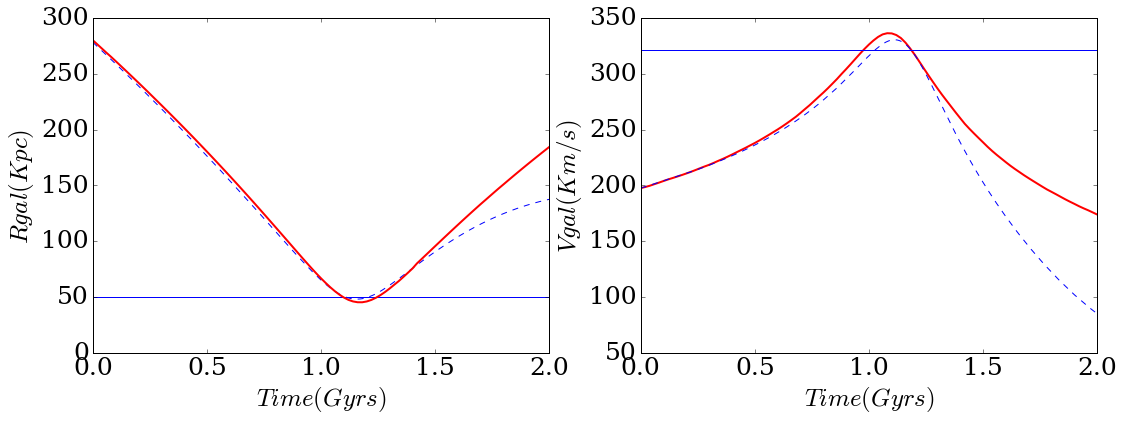

In [89]:
figure(figsize=(18, 6))
subplot(1, 2, 1)
#plot(t12, R12, ls='--')
#plot(t13, R13, ls='--')
#plot(t14, R14, ls='--')
plot(t15, R15, ls='--')
plot(t16, R16, ls='--')

plt.axhline(real_r)
#plot(t16, R16)
#plot(t17, R17)
plot(tNB14, RNB14, lw=2, c='r')
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Rgal(Kpc)$')

subplot(1, 2, 2)
plot(tNB14, VNB14, lw=2, c='r')
#plot(t12, V12, ls='--')
#plot(t13, V13, ls='--')
#plot(t14, V14, ls='--')
plot(t15, V15, ls='--')
#plot(t16, V16, ls='--')
plt.axhline(real_v)
#plot(t16, V16)
#plot(t17, V17)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Vgal(Km/s)$')
savefig('finding_ICs.png', bbox_inches='tight')

In [78]:
#def xi2():

In [51]:
ICs(t14, R14, x14, y14, z14, vx14, vy14, vz14, xNB14, yNB14, zNB14, vxNB14, vyNB14, vzNB14)

(6.5526109999999989,
 280.73288200000007,
 -44.629248000000032,
 8.063741000000002,
 -175.16339999999997,
 -33.244045999999997,
 -1.264)